<h1>viiivvi<h1>
<h2>parameter Curves</h2>
<h4> Commissioned by Ensemble IPSE
<h4>Polansky/Kant</h4>
<h5>3.17</h5>


In [10]:
# imports
import random
import math
import matplotlib.pyplot as plt
import pretty_midi
import midi
%matplotlib inline

In [11]:
# linear intepolation between two values
def lin_interp(t, v1, v2): 
    return (float(v2-v1)*t)+v1

# half cosine intepolation between two points
def hcos_interp(t, v1=0, v2=1): 
    return (v1+v2)/2.0 + ((v1-v2)/2.0)*math.cos(math.pi*t)

# exponential intepolation between two points
def exp_interp(t, v1, v2, k=1):
    k = k if v2>v1 else -k
    return v1 + (math.e**(float(k)*t)-1)/(math.e**float(k)-1) * (v2-v1)

In [12]:
# function def
def interp_2D(t, points, ifunc=hcos_interp):

    # xs
    xs = [p[0] for p in points]
    
    # nearest xs lower
    p1_index = sum([t >= x for x in xs])-1
    p1 = points[p1_index][0]
    
    # nearest xs upper
    p2_index = min(sum([t >= x for x in xs]),len(xs)-1)
    p2 = points[p2_index][0]
    
    # delta
    dt = (t-p1)/(p2-p1) if (p2-p1) != 0 else t-p1
    
    # interp
    return ifunc(dt, points[p1_index][1], points[p2_index][1])

In [13]:
# example use: one call

# points 1
xs1 = [0, .5, .7, 1]
ys1 = [.5, 1, .2, 1]
points1 = zip(xs1, ys1)

# interp
interp_2D(0.2, points1)

0.6727457514062631

In [14]:
# example use: step through 0 to 1

# points 1
xs1 = [0, .5, .7, 1]
ys1 = [.5, 1, .2, 1]
points1 = zip(xs1, ys1)

# interp
for i in range(101):
    print float(i)/100,
    print '\t',
    print interp_2D(float(i)/100, points1)

0.0 	0.5
0.01 	0.500493317893
0.02 	0.501971324671
0.03 	0.504428187318
0.04 	0.507854209718
0.05 	0.512235870926
0.06 	0.517555878528
0.07 	0.523793236883
0.08 	0.530923329989
0.09 	0.538918018624
0.1 	0.547745751406
0.11 	0.557371689306
0.12 	0.567757843145
0.13 	0.578863223518
0.14 	0.590644002563
0.15 	0.603053686927
0.16 	0.616043301255
0.17 	0.629561581475
0.18 	0.643555177109
0.19 	0.657968861829
0.2 	0.672745751406
0.21 	0.687827528209
0.22 	0.703154671354
0.23 	0.718666691609
0.24 	0.734302370118
0.25 	0.75
0.26 	0.765697629882
0.27 	0.781333308391
0.28 	0.796845328646
0.29 	0.812172471791
0.3 	0.827254248594
0.31 	0.842031138171
0.32 	0.856444822891
0.33 	0.870438418525
0.34 	0.883956698745
0.35 	0.896946313073
0.36 	0.909355997437
0.37 	0.921136776482
0.38 	0.932242156855
0.39 	0.942628310694
0.4 	0.952254248594
0.41 	0.961081981376
0.42 	0.969076670011
0.43 	0.976206763117
0.44 	0.982444121472
0.45 	0.987764129074
0.46 	0.992145790282
0.47 	0.995571812682
0.48 	0.9980286753

In [15]:
# plot function
def plot(points, fig=None):
    if fig is None: fig = plt.figure(figsize=(12,6))
    plt.scatter([p[0] for p in points], [p[1] for p in points])   
    ilist = [float(i)/100 for i in range(101)]
    interped = [interp_2D(i, points) for i in ilist]
    plt.plot(ilist, [p for p in interped]);

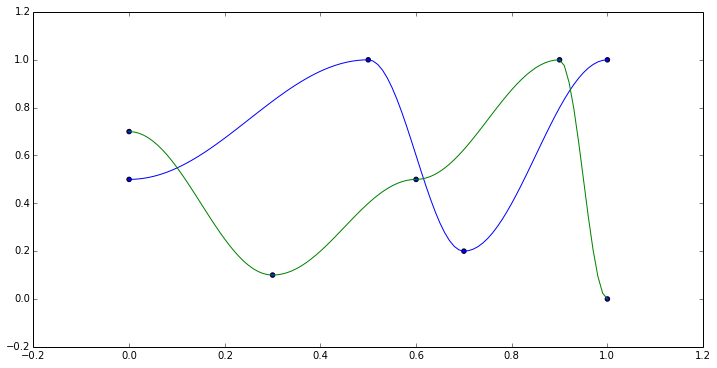

In [16]:
# points 1
xs1 = [0, .5, .7, 1]
ys1 = [.5, 1, .2, 1]
points1 = zip(xs1, ys1)

# points 2
xs2 = [0, .3, .6, .9, 1]
ys2 = [.7, .1, .5, 1, 0]
points2 = zip(xs2, ys2)
    
# plot
fig = plt.figure(figsize=(12,6))
plot(points1, fig=fig)
plot(points2, fig=fig)

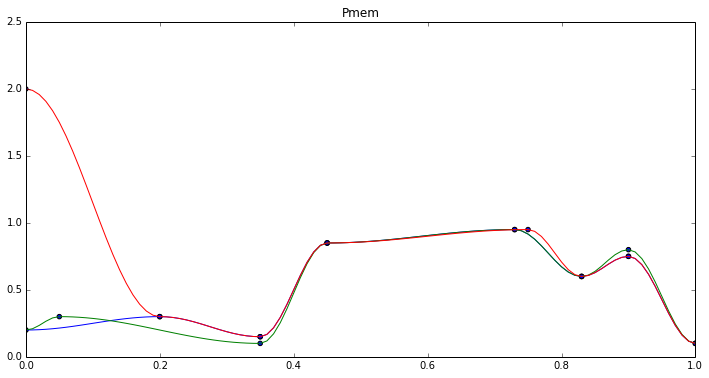

In [17]:

phi = .6180
pmempt0 = [ 0.0, .2, .35, .45, phi + .13, .83, .9,  1 ]
pmemp0= [ .2, .3, .15, .85, .95, phi, .75, .1 ]
points1 = zip(pmempt0, pmemp0)
pmempt1= [ 0.0, .05, .35, .45, phi + .13, .83, .9,  1 ]
pmemp1 = [ .2, .3, .10, .85, .95, phi, .8, .1 ]
points2 = zip(pmempt1, pmemp1)
pmempt6 = (0.0, .2, .35, .45, phi + .15, .83, .9,  1 ) 
pmemp6 =  (2, .3, .15, .85, .95, phi, .75, .1 )
points6 = zip(pmempt6, pmemp6)
    
# plot
fig = plt.figure(figsize=(12,6))
plot(points1, fig=fig)
plot(points2, fig=fig)
plot(points6, fig=fig)
plt.xlim([0, 1])
plt.title("Pmem")
plt.savefig("Pmem.png" )